***
# `Project:` Prevendo o Nível de Satisfação dos Clientes do Santander

## `Date:` julho, 2020

## `Data Scientist:` Walter Trevisan
***

## `05-` Machine Learning (`Step 02`)

Nesta etapa, vamos continuar a fase de **`Machine Learning`**, treinando e analisando outros algoritmos de classificação. Utilizaremos os datasets de treinamento que foram *balanceados* na etapa anterior (**`Machine Learning (Step 01)`**).

Então, vamos realizar as seguintes atividades:

1. Carregar os datasets de treinamento que foram **balanceados** na etapa anterior: **`X_train_v2.pickle.pickle`** e **`y_train_v2.pickle.pickle`**;


2. Definir e carregar as **`métricas de classificação`** que foram calculadas (para alguns algoritmos) na etapa anterior (**`Machine Learning (Step 01)`**): **`classif_metrics_df.pickle`**;


3. Treinar mais alguns algoritmos de classificação, utilizando **`Feature Selection`** e **`Cross Validation`**:

> Nesta etapa serão treinados os seguintes algoritmos:

>> **` RFC`**: Random Forest Classifier;
>> **` LDA`**: Linear Discriminant Analysis;
>> **`LSVC`**: Linear Support Vector Classification;
>> **`XGBC`**: XGBoost Classifier.


4. Conclusão dos resultados e **seleção** dos **melhores algoritmos de classificação** que serão utilizados na próxima etapa (**`Machine Learning (Step 03)`**);


5. Salvar todas as **métricas de classificação** calculadas nas duas etapas de **`Machine Learning`** (**`Step 01`** e **`Step 02`**).

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas
import itertools

# To plot pretty figures
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Imports para "Avaliação da curva ROC":
from sklearn.metrics import roc_curve, roc_auc_score

# Machine Learning imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score, cross_val_predict

# Flag de "Treinamento":
# Se "True", realiza o treinamento dos algoritmos.
# Se "False", faz a leitura dos modelos (objetos) treinados.
TRAINING=True

# Flag para calcular/ler os "scores" de "Treinamento":
# Se "True", realiza o cálculo das pontuações (scores).
# Se "False", faz a leitura dos scores (objetos) calculados.
CROSS_VAL_SCORE=True

# Flag para fazer as previsões, utilizando validação cruzada, nos dados de treinamento:
# Se "True", faz as previsões utilizando a função.
# Se "False", faz a leitura das previsões (objetos) que foram salvas.
CROSS_VAL_PREDICT=True

# Define valor para "Cross Validation" (Número de 'folds'):
NUM_FOLDS=5 # Número de passadas ("folds")

# Define valor para "Cross Validation Score" (Número de 'folds'):
NUM_FOLDS_CVS=5 # Número de passadas ("folds")

# Define valor para "Cross Validation Predict" (Número de 'folds'):
NUM_FOLDS_CVP=5 # Número de passadas ("folds")

# Define valor para reproduzirmos os mesmos resultados:
RANDOM_STATE=42 # Seed

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "05-Machine_Learning")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Modelos" (Machine Learning) relacionados ao Projeto:
PROJECT_ML_PATH = os.path.join(PROJECT_ROOT_DIR, "Models")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_ML_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_ML_Library_v1_0":
import DataScience_ML_Library_v1_0 as mllib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

# Criando um objeto para calularmos os tempos de treinamento:
et = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

seaborn    0.10.0
matplotlib 3.2.1
numpy      1.18.2
pandas     0.25.3
Walter Trevisan


## `01-` Carregando os `datasets`: `X_train_v2.pickle` e `y_train_v2.pickle`

In [3]:
# Carregando o dataset "X_train" (Variáveis Preditoras):
X_train = dslib.pickle_object_load (path=PROJECT_DATA_PATH, file="X_train_v2.pickle",
                                    msg="The 'X_train_v2' (dataset) has been successfully uploaded!")

# Carregando o dataset "y_train" (Variável Target):
y_train = dslib.pickle_object_load (path=PROJECT_DATA_PATH, file="y_train_v2.pickle",
                                    msg="The 'y_train_v2' (dataset) has been successfully uploaded!")

# Carregando os nomes das 'features' do dataset "X_train" (Variáveis Preditoras):
feat_names = dslib.pickle_object_load (path=PROJECT_DATA_PATH, file="features_names.pickle",
                                       msg="The 'features_names' has been successfully uploaded!")

The 'X_train_v2' (dataset) has been successfully uploaded!
The 'y_train_v2' (dataset) has been successfully uploaded!
The 'features_names' has been successfully uploaded!


## `02-` Definição das `Métricas de Classificação`:

### Métricas: `Accuracy`, `Precision`, `Recall`, `f1-score` e `ROC Curve (AUC)`

### `Accuracy`:

A **acurácia** do modelo mede a taxa de acertos das classes ***True Positive*** e ***True Negative***, sendo calculada pela fórmula abaixo:

**`Accuracy = (TP + TN)/(TP + TN + FP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`TN`** é o número de ***verdadeiros negativos***;

3. **`FP`** é o número de ***falsos positivos***.

4. **`FN`** é o número de ***falsos negativos***.

Um classificador perfeito teria apenas *verdadeiros positivos* (**TP**) e *verdadeiros negativos* (**TN**), ou seja, sua **matriz de confusão** teria valores diferentes de zero somente na sua diagonal principal (superior esquerda para a inferior direita), ou seja, a sua acurácia (**`accuracy`**) seria de **100%**.

### `Precision`:

Uma outra métrica interessante a ser observada na ***matriz de confusão*** é a `acurácia das previsões positivas`; que é chamada de ***precisão (precision)*** do classificador e é calculada pela fórmula abaixo:

**`Precision = TP/(TP + FP)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FP`** é o número de ***falsos positivos***.

### `Recall`:

Entretanto, a precisão é utilizada em conjunto com outra métrica chamada ***revocação (recall)***, também conhecida como ***sensibilidade*** ou ***taxa de verdadeiros positivos (TPR)***: esta é a taxa de `instâncias positivas que são corretamente detectadas` pelo classificador, sendo calculada pel fórmula abaixo:

**`Recall = TP/(TP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***.

### `f1-score`:

Muitas vezes, é conveniente combinarmos **precisão** e **revocação** em uma única métrica chamada ***pontuação F1 (f1 score)***, principalmente se precisarmos comparar dois ou mais classificadores.

A ***pontuação F1*** é a ***média harmônica*** da **precisão** e **revocação**, sendo calculada pela fórmula abaixo:

**`F1 = TP/(TP + (FN + FP)/2)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***;

3. **`FP`** é o número de ***falsos positivos***.

Enquanto a média regular trata igualmente todos os valores, a média harmônica dá muito mais peso aos valores mais baixos, ou seja, o classificador só obterá uma ***pontuação F1*** alta, se a **revocação** e a **precisão** forem altas.

### `ROC Curve (AUC)`

A curva **ROC** (*características operacionais do receptor*) é outra ferramenta comum utilizada com classificadores binários. É muito semelhante à curva de **`precision/recall`**, mas, em vez de plotar a **precision versus recall**, a curva **ROC** plota a *taxa de verdadeiros positivos* (***TPR = True Positive Rate***), que é um outro nome dado para ***recall***, versus a *taxa de falsos positivos* (***FPR = False Positive Rate***). O ***FPR*** é a razão de instâncias negativas incorretamente classificadas como positivas. É igual a 1 menos *taxa de verdadeiros negativos* (***TNR = True Negative Rate***), que é a razão de instâncias negativas que são corretamente classificadas como negativas. A ***TNR*** também é chamada de ***especificidade***.

Portanto, a ***Curva ROC*** plota a ***`sensibilidade (recall)` versus `1 - especificidade`***.

Equações:

1. **`TPR = TP/(TP + FN)`** --> ***True Positive Rate***, ou também ***`recall`*** ou também ***`sensibilidade`***

2. **`FPR = FP/(FP + TN)`** --> ***False Positive Rate***

3. **`TNR = TN/(TN + FP)`** --> ***True Negative Rate***, ou também ***especificidade***

4. **`FPR = 1 - TNR`** ou também **`FPR = 1 - especificidade`**

Então, para plotarmos a ***ROC curve***, primeiro precisamos calcular a **TPR** e a **FPR** para vários valores de ***thresholds*** (limiares) utilizando a função ***`roc_curve()`***.

Mas, a função `roc_curve()` utiliza as **pontuações de decisão** (ao invés das previsões) de todas as instâncias do nosso dataset, ou seja, precisamos primeiro calcular estas pontuações (`scores`) de decisão utilizando o método `decision_function` da função `cross_val_predict()`.

Entretando, devido ao modo como funcionam, alguns classificadores (por exemplo: a classe `KNeighborsClassifier`) não possuem um método `decision_function()`. Em vez disso, eles possuem um método chamado `predict_proba()`. Este método retorna um array que contém uma linha por instância e uma coluna por classe, cada uma contendo a probabilidade de a instância dada pertencer à classe dada (por exemplo, neste projeto, 70% de chance de um cliente estar insatisfeito). Portanto, quando utilizarmos estes classificadores, primeiro precisaremos calcular as probabilidades com o método `predict_proba()`, e, então, em seguida calcularemos as *pontuações de decisão* utilizando a probabilidade da classe positiva como sendo a pontuação.

Observando o gráfico da **Curva ROC**, quanto maior a ***`TPR (recall)`***, mais falsos positivos (***`FPR`***) o classificador produz, ou seja, menor é a sua **precisão** (***`precision`***). A linha pontilhada representa a curva ROC de um classificador puramente aleatório; um bom classificador fica mais distante dessa linha possível (em direção ao canto superior esquerdo)!

Uma forma de compararmos dois ou mais classificadores é medirmos a **área abaixo da curva** (***`AUC = Area Under Curve`***). Um classificador perfeito terá um ***`ROC AUC = 1`***, enquanto que um classificador puramente aleatório terá um ***`ROC AUC = 0.5`***.

### `2.1-` Carregando as `métricas de classificação` calculadas na etapa anterior (`Step 01`):

In [4]:
# Carregando as métricas de classificação:
classif_metrics_df = dslib.pickle_object_load (path=PROJECT_ML_PATH, file="classif_metrics_df_v1.pickle",
                                               msg="The 'classif_metrics_df_v1' (metrics) has been successfully uploaded!")

The 'classif_metrics_df_v1' (metrics) has been successfully uploaded!


## `03-` Treinamento dos algoritmos com `Feature Selection` e `Cross Validation`:

Agora, vamos realizar o treinamento de outros algoritmos de `machine learning`, selecionando as `features` mais significativas (`importantes`) com `cross validation`. Utilizaremos a função **[RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)** (*Feature ranking with recursive feature elimination and cross-validated selection of the best number of features*) do pacote `feature_selection` do `Scikit-Learn`.

## `3.1-` [RFC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (Random Forest Classifier):

In [5]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (RFC)..."))
    
    # Criando uma instância do classificador RFC:
    rfc = RandomForestClassifier(random_state=RANDOM_STATE)
    
    # Criando a instância de "RFECV":
    rfecv_rfc = RFECV(estimator=rfc, step=1, cv=NUM_FOLDS, scoring='accuracy', n_jobs=-1)
    
    # Fit nos dados de treinamento:
    rfecv_rfc.fit(X_train, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (RFC):")

    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfecv_rfc_v1.pickle", object_name=rfecv_rfc,
                              msg="Version 1 of the model (RFC) was successfully saved!")
else:
    # O modelo (RFC) já foi treinado!
    # Carregando o modelo "rfecv_rfc_v1.pickle":
    rfecv_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_rfc_v1.pickle",
                                         msg="The model (RFC) has been successfully uploaded!")

The model (RFC) has been successfully uploaded!


**Análise:** o treinamento do **`RFC`** demorou **`17.43 minutos`**.

Optimal number of features : 28
Best accuracy: 0.9309
Saving figure: plot_nbf_vs_cvs_rfc


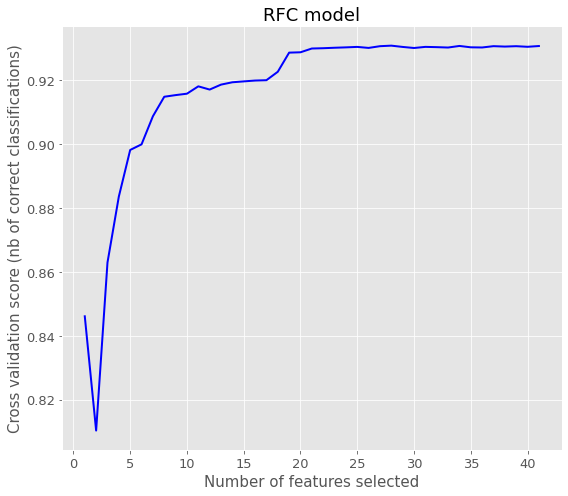

Saving figure: plot_nbf_vs_cvs_zoomed_rfc


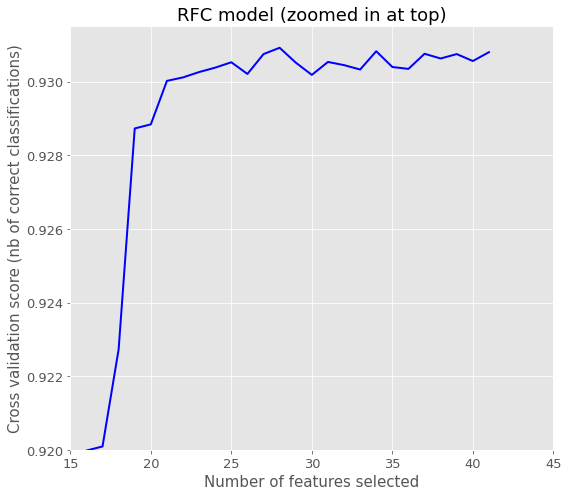

In [6]:
# Plot: número de features versus cross-validation scores:
print("Optimal number of features : %d" % rfecv_rfc.n_features_)
print("Best accuracy: {}".format(np.round(rfecv_rfc.grid_scores_[rfecv_rfc.n_features_-1], decimals=4)))
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_rfc.grid_scores_) + 1), cv_scores=rfecv_rfc.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=None,
                                   title='RFC model', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_rfc', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

# Plot: número de features versus cross-validation scores (com 'foco' na parte de cima do gráfico):
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_rfc.grid_scores_) + 1), cv_scores=rfecv_rfc.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=[15, 45, 0.9200, 0.9315],
                                   title='RFC model (zoomed in at top)', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_zoomed_rfc', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

In [7]:
# Sumariza a seleção das melhores features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfecv_rfc.get_support(), feat_names)]
selected_features = [v for i, v in feature_map if i==True]

# Visualizando as features selecionadas:
print("Selected features: {}".format(len(selected_features)))
print(selected_features)

Selected features: 28
['ind_var30_cat_0', 'ind_var30_cat_1', 'num_var4_cat_1', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'saldo_var42_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


In [8]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes):
X_train_rfc = X_train[:, rfecv_rfc.get_support()]
print("X_train_rfc (shape):",X_train_rfc.shape)

X_train_rfc (shape): (116820, 28)


**Análise:** com o algoritmo **`RFC`** obtivemos uma ótima acurácia de **`93.09%`** utilizando **`28`** features.

Agora, utilizaremos a função ***`cros_val_score()`*** para avaliarmos o nosso modelo ***`RandomForestClassifier`*** com a utilização da validação cruzada:

> Utilizar **`CROSS_VAL_SCORE=True`** (no **Setup**) para calcular as pontuações (Scores) com o modelo, utilizando a função. Neste caso as pontuações serão **salvas em um objeto**;

> Utilizar **`CROSS_VAL_SCORE=False`** (no **Setup**) para ler e carregar em um objeto as pontuações (Scores) que foram calculadas com o modelo, utilizando a função.

In [9]:
# Calculando as pontuações (scores) nos dados de treinamento:
# Verifica se vamos calcular as pontuações utilizando "validação cruzada":
if (CROSS_VAL_SCORE): # Utilizar "CROSS_VAL_SCORE=True" (no Setup) para calcular os 'scores'!
    # Inicia o cálculo dos 'scores':
    et.start(et.start(msg="Starting cross validation score (RFC)..."))
    rfc_scores = cross_val_score(estimator=rfecv_rfc.estimator_, X=X_train_rfc, y=y_train,
                                 cv=NUM_FOLDS_CVS, scoring="accuracy", n_jobs=-1)
    # Fim do cálculo dos 'scores':
    et.end(msg="Time consumed for cross validation score (RFC):")
    
    # Salvando as pontuações (scores) calculadas:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfc_scores_v1.pickle", object_name=rfc_scores,
                              msg="Version 1 of the scores (RFC) was successfully saved!")
else:
    # As pontuações (scores) já foram calculadas!
    # Carregando os scores "rfc_scores_v1.pickle":
    rfc_scores = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfc_scores_v1.pickle",
                                          msg="The scores (RFC) has been successfully uploaded!")

The scores (RFC) has been successfully uploaded!


In [10]:
# Mostrando os resultados:
mllib.display_scores(scores=rfc_scores)

Scores: 5
[0.906  0.937  0.9387 0.9353 0.9372]
Mean: 0.9308
Standard deviation: 0.0125


**Análise:** o tempo consumido para cálcularmos as pontuações (**`scores`**), com o modelo **`RFC`**, foi de **18.41 segundos**. Obtivemos um resultado **excelente (acima de 93%**) em quase todas as partes (*folds*) da validação cruzada.

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [11]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (RFC)..."))
    y_train_pred_rfc = cross_val_predict(estimator=rfecv_rfc.estimator_, X=X_train_rfc, y=y_train,
                                         cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (RFC):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_rfc_v1.pickle", object_name=y_train_pred_rfc,
                              msg="Version 1 of the predicts (RFC) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_rfc_v1.pickle":
    y_train_pred_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_rfc_v1.pickle",
                                                msg="The predicts (RFC) has been successfully uploaded!")

The predicts (RFC) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`RFC`**, foi de **17.71 segundos**.

Saving figure: plot_confusion_matrix_rfc_v1


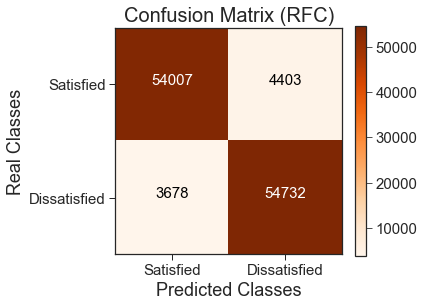

In [12]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_rfc, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (RFC)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_rfc_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 54007`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 4403`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 3678`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 54732`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [13]:
# Calculando e mostrando as métricas de classificação com o "RFC":
print("Metrics of 'RFC' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_rfc, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['RFC', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['RFC', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['RFC', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['RFC', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'RFC' model:
Accuracy = 0.9308
Precision = 0.9255
Recall = 0.9370
f1-score = 0.9313


**Análise:**

1. com o classificador **`RFC`** obtivemos uma taxa de **acurácia** de **93.08%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`RFC`** apresentou um resultado *acima do mínimo desejado*;


2. com o nosso classificador **`RFC`** obtivemos uma taxa de **precisão** de **92.55%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`RFC`** obtivemos uma taxa de **revocação** de **93.70%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`RFC`** apresentou um resultado *acima do mínimo desejado*;


4. com o classificador **`RFC`** obtivemos uma **`pontuação F1`** **alta**, devido as ótimas taxa de **precisão** e **revocação**.

### `Curva ROC`

In [14]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (RFC)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_rfc = cross_val_predict(estimator=rfecv_rfc.estimator_, X=X_train_rfc, y=y_train,
                                     cv=NUM_FOLDS_CVP, method="predict_proba", n_jobs=-1)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_rfc = y_probas_rfc[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (RFC):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_rfc_v1.pickle", object_name=y_dec_scores_rfc,
                              msg="Version 1 of the decision scores (RFC) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_rfc_v1.pickle":
    y_dec_scores_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_rfc_v1.pickle",
                                                msg="The decision scores (RFC) has been successfully uploaded!")

The decision scores (RFC) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`RFC`**, foi de **17.21 segundos**.

In [15]:
# Calculando o "FPR" e "TPR":
fpr, tpr, thresholds = roc_curve(y_train, y_dec_scores_rfc)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_rfc)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['RFC', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_rfc_v1


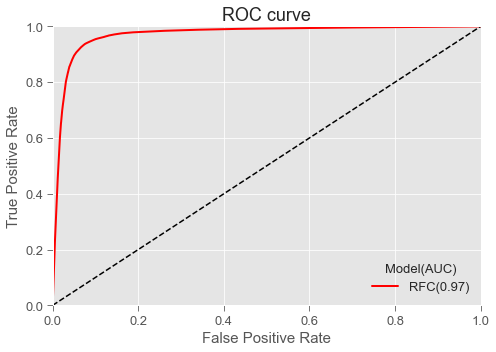

In [16]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr, tpr, auc=auc, auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='RFC', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_rfc_v1', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`RFC`** apresentou uma ***`ROC curve`*** **muito próxima** do *canto superior esquerdo*!

## `3.2-` [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) (Linear Discriminant Analysis):

In [17]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (LDA)..."))
    
    # Criando uma instância do classificador LDA:
    lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
        
    # Criando a instância de "RFECV":
    rfecv_lda = RFECV(estimator=lda, step=1, cv=NUM_FOLDS, scoring='accuracy', n_jobs=-1)
    
    # Fit nos dados de treinamento:
    rfecv_lda.fit(X_train, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (LDA):")

    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfecv_lda_v1.pickle", object_name=rfecv_lda,
                              msg="Version 1 of the model (LDA) was successfully saved!")
else:
    # O modelo (LDA) já foi treinado!
    # Carregando o modelo "rfecv_lda_v1.pickle":
    rfecv_lda = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_lda_v1.pickle",
                                         msg="The model (LDA) has been successfully uploaded!")

The model (LDA) has been successfully uploaded!


**Análise:** o treinamento do **`LDA`** demorou **`23.86 segundos`**.

Optimal number of features : 41
Best accuracy: 0.7439
Saving figure: plot_nbf_vs_cvs_lda


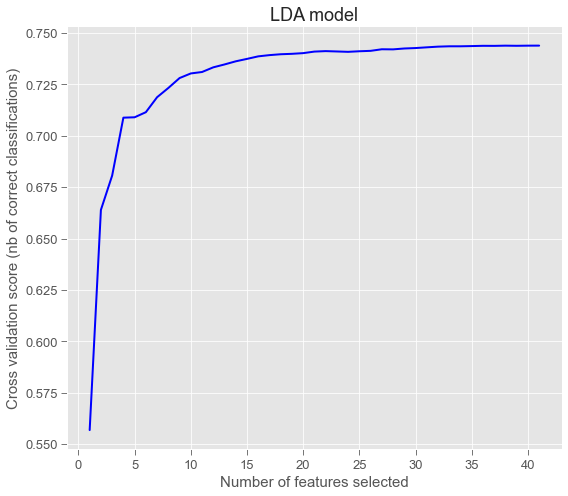

Saving figure: plot_nbf_vs_cvs_zoomed_lda


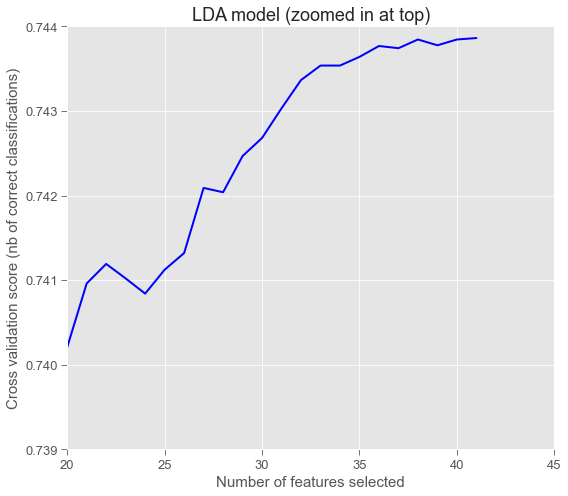

In [18]:
# Plot: número de features versus cross-validation scores:
print("Optimal number of features : %d" % rfecv_lda.n_features_)
print("Best accuracy: {}".format(np.round(rfecv_lda.grid_scores_[rfecv_lda.n_features_-1], decimals=4)))
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_lda.grid_scores_) + 1), cv_scores=rfecv_lda.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=None,
                                   title='LDA model', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_lda', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

# Plot: número de features versus cross-validation scores (com 'foco' na parte de cima do gráfico):
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_lda.grid_scores_) + 1), cv_scores=rfecv_lda.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=[20, 45, 0.7390, 0.7440],
                                   title='LDA model (zoomed in at top)', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_zoomed_lda', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

In [19]:
# Sumariza a seleção das melhores features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfecv_lda.get_support(), feat_names)]
selected_features = [v for i, v in feature_map if i==True]

# Visualizando as features selecionadas:
print("Selected features: {}".format(len(selected_features)))
print(selected_features)

Selected features: 41
['ind_var30_cat_0', 'ind_var30_cat_1', 'num_var4_cat_0', 'num_var4_cat_1', 'num_var4_cat_2', 'num_var4_cat_3', 'num_var4_cat_4', 'num_var4_cat_5', 'num_var4_cat_6', 'num_var4_cat_7', 'var36_cat_0', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_1', 'num_meses_var5_ult3_cat_2', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'num_meses_var39_vig_ult3_cat_3', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var42_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'num_var5_pt', 'saldo_var42_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


**Análise:** com o algoritmo **`LDA`** obtivemos uma boa acurácia (**`74.39%`**) utilizando **`41`** features. 

Agora, utilizaremos a função ***`cros_val_score()`*** para avaliarmos o nosso modelo ***`LinearDiscriminantAnalysis`*** com a utilização da validação cruzada:

> Utilizar **`CROSS_VAL_SCORE=True`** (no **Setup**) para calcular as pontuações (Scores) com o modelo, utilizando a função. Neste caso as pontuações serão **salvas em um objeto**;

> Utilizar **`CROSS_VAL_SCORE=False`** (no **Setup**) para ler e carregar em um objeto as pontuações (Scores) que foram calculadas com o modelo, utilizando a função.

In [20]:
# Calculando as pontuações (scores) nos dados de treinamento:
# Verifica se vamos calcular as pontuações utilizando "validação cruzada":
if (CROSS_VAL_SCORE): # Utilizar "CROSS_VAL_SCORE=True" (no Setup) para calcular os 'scores'!
    # Inicia o cálculo dos 'scores':
    et.start(et.start(msg="Starting cross validation score (LDA)..."))
    lda_scores = cross_val_score(estimator=rfecv_lda.estimator_, X=X_train, y=y_train,
                                 cv=NUM_FOLDS_CVS, scoring="accuracy", n_jobs=-1)
    # Fim do cálculo dos 'scores':
    et.end(msg="Time consumed for cross validation score (LDA):")
    
    # Salvando as pontuações calculadas:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="lda_scores_v1.pickle", object_name=lda_scores,
                              msg="Version 1 of the scores (LDA) was successfully saved!")
else:
    # As pontuações (scores) já foram calculadas!
    # Carregando os scores "lda_scores_v1.pickle":
    lda_scores = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="lda_scores_v1.pickle",
                                          msg="The scores (LDA) has been successfully uploaded!")

The scores (LDA) has been successfully uploaded!


In [21]:
# Mostrando os resultados:
mllib.display_scores(scores=lda_scores)

Scores: 5
[0.7448 0.7429 0.7473 0.7372 0.7472]
Mean: 0.7439
Standard deviation: 0.0037


**Análise:** o tempo consumido para cálcularmos as pontuações (**`scores`**), com o modelo **`LDA`**, foi de **1.79 segundos**. Obtivemos um resultado **satisfatório (acima de 74%**) em quase todas as partes (*folds*) da validação cruzada.

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [22]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (LDA)..."))
    y_train_pred_lda = cross_val_predict(estimator=rfecv_lda.estimator_, X=X_train, y=y_train,
                                         cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (LDA):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_lda_v1.pickle", object_name=y_train_pred_lda,
                              msg="Version 1 of the predicts (LDA) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_lda_v1.pickle":
    y_train_pred_lda = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_lda_v1.pickle",
                                                msg="The predicts (LDA) has been successfully uploaded!")

The predicts (LDA) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`LDA`**, foi de **1.64 segundos**.

Saving figure: plot_confusion_matrix_lda_v1


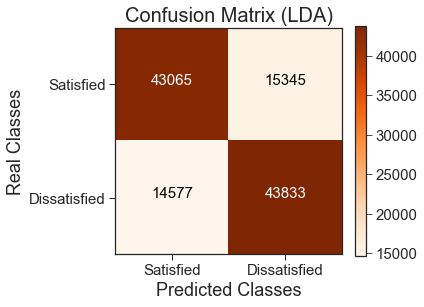

In [23]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_lda, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (LDA)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_lda_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 43065`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 15345`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 14577`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 43833`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [24]:
# Calculando e mostrando as métricas de classificação com o "LDA":
print("Metrics of 'LDA' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_lda, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['LDA', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['LDA', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['LDA', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['LDA', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'LDA' model:
Accuracy = 0.7439
Precision = 0.7407
Recall = 0.7504
f1-score = 0.7455


**Análise:**

1. com o classificador **`LDA`** obtivemos uma taxa de **acurácia** de **74.39%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`LDA`** apresentou um resultado *muito abaixo do mínimo desejado*;


2. com o nosso classificador **`LDA`** obtivemos uma taxa de **precisão** de **74.07%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`LDA`** obtivemos uma taxa de **revocação** de **75.04%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`LDA`** apresentou um resultado *muito abaixo do mínimo desejado*;


4. com o classificador **`LDA`** obtivemos uma **`pontuação F1`** **baixa**, porque as taxas de **precisão** e **revocação** também foram baixas.

### `Curva ROC`

In [25]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (LDA)..."))
    y_dec_scores_lda = cross_val_predict(estimator=rfecv_lda.estimator_, X=X_train, y=y_train,
                                         cv=NUM_FOLDS_CVP, method="decision_function", n_jobs=-1)
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (LDA):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_lda_v1.pickle", object_name=y_dec_scores_lda,
                              msg="Version 1 of the decision scores (LDA) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_lda_v1.pickle":
    y_dec_scores_lda = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_lda_v1.pickle",
                                                msg="The decision scores (LDA) has been successfully uploaded!")

The decision scores (LDA) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`LDA`**, foi de **1.69 segundos**.

In [26]:
# Calculando o "FPR" e "TPR":
fpr, tpr, thresholds = roc_curve(y_train, y_dec_scores_lda)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_lda)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['LDA', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_lda_v1


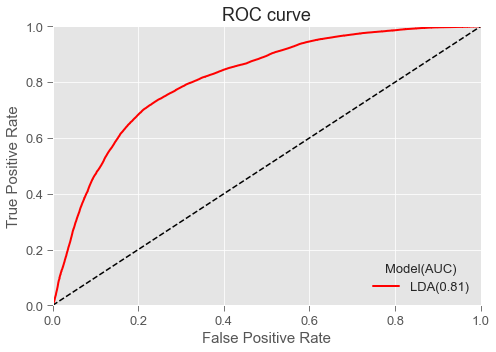

In [27]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr, tpr, auc=auc, auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='LDA', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_lda_v1', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`LDA`** apresentou uma ***`ROC curve`*** **distante** do *canto superior esquerdo*!

## `3.3-` [LSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (Linear Support Vector Classification):

In [28]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (LSVC)..."))
    
    # Criando uma instância do classificador LSVC:
    lsvc = LinearSVC(dual=False, random_state=RANDOM_STATE, max_iter=1000)
            
    # Criando a instância de "RFECV":
    rfecv_lsvc = RFECV(estimator=lsvc, step=1, cv=NUM_FOLDS, scoring='accuracy', n_jobs=-1)
    
    # Fit nos dados de treinamento:
    rfecv_lsvc.fit(X_train, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (LSVC):")

    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfecv_lsvc_v1.pickle", object_name=rfecv_lsvc,
                              msg="Version 1 of the model (LSVC) was successfully saved!")
else:
    # O modelo (LSVC) já foi treinado!
    # Carregando o modelo "rfecv_lsvc_v1.pickle":
    rfecv_lsvc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_lsvc_v1.pickle",
                                          msg="The model (LSVC) has been successfully uploaded!")

The model (LSVC) has been successfully uploaded!


**Análise:** o treinamento do **`LSVC`** demorou **`55.32 segundos`**.

Optimal number of features : 40
Best accuracy: 0.7506
Saving figure: plot_nbf_vs_cvs_lsvc


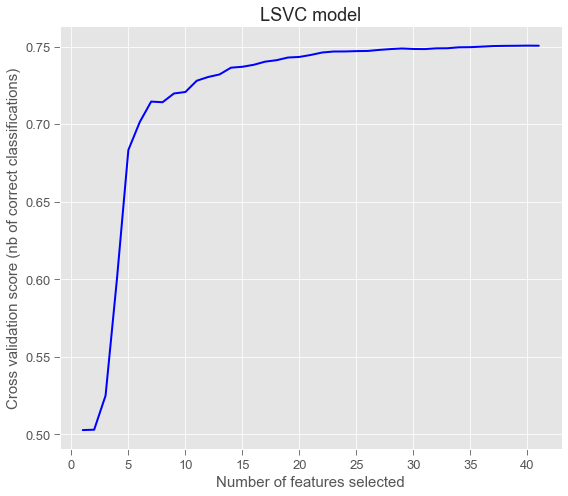

Saving figure: plot_nbf_vs_cvs_zoomed_lscv


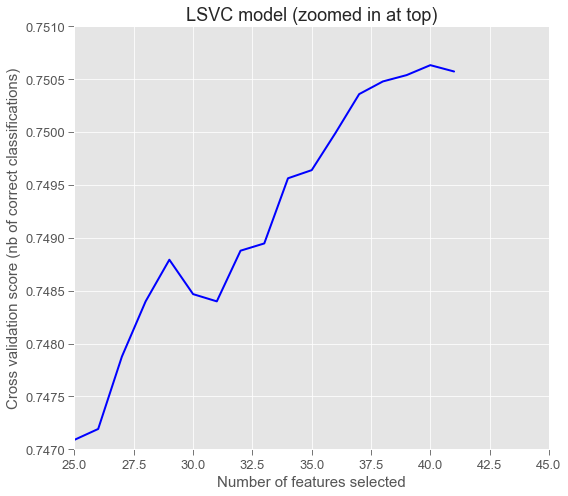

In [29]:
# Plot: número de features versus cross-validation scores:
print("Optimal number of features : %d" % rfecv_lsvc.n_features_)
print("Best accuracy: {}".format(np.round(rfecv_lsvc.grid_scores_[rfecv_lsvc.n_features_-1], decimals=4)))
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_lsvc.grid_scores_) + 1), cv_scores=rfecv_lsvc.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=None,
                                   title='LSVC model', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_lsvc', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

# Plot: número de features versus cross-validation scores (com 'foco' na parte de cima do gráfico):
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_lsvc.grid_scores_) + 1), cv_scores=rfecv_lsvc.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=[25, 45, 0.747, 0.751],
                                   title='LSVC model (zoomed in at top)', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_zoomed_lscv', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

In [30]:
# Sumariza a seleção das melhores features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfecv_lsvc.get_support(), feat_names)]
selected_features = [v for i, v in feature_map if i==True]

# Visualizando as features selecionadas:
print("Selected features: {}".format(len(selected_features)))
print(selected_features)

Selected features: 40
['ind_var30_cat_0', 'ind_var30_cat_1', 'num_var4_cat_0', 'num_var4_cat_1', 'num_var4_cat_2', 'num_var4_cat_3', 'num_var4_cat_4', 'num_var4_cat_5', 'num_var4_cat_6', 'num_var4_cat_7', 'var36_cat_0', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_1', 'num_meses_var5_ult3_cat_2', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'num_meses_var39_vig_ult3_cat_3', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var42_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'num_var5_pt', 'saldo_var42_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


In [31]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes):
X_train_lsvc = X_train[:, rfecv_lsvc.get_support()]
print("X_train_lsvc (shape):",X_train_lsvc.shape)

X_train_lsvc (shape): (116820, 40)


**Análise:** com o algoritmo **`LSVC`** obtivemos uma boa acurácia (**`75.06%`**) utilizando **`40`** features.

Agora, utilizaremos a função ***`cros_val_score()`*** para avaliarmos o nosso modelo ***`LinearSVC`*** com a utilização da validação cruzada:

> Utilizar **`CROSS_VAL_SCORE=True`** (no **Setup**) para calcular as pontuações (Scores) com o modelo, utilizando a função. Neste caso as pontuações serão **salvas em um objeto**;

> Utilizar **`CROSS_VAL_SCORE=False`** (no **Setup**) para ler e carregar em um objeto as pontuações (Scores) que foram calculadas com o modelo, utilizando a função.

In [32]:
# Calculando as pontuações (scores) nos dados de treinamento:
# Verifica se vamos calcular as pontuações utilizando "validação cruzada":
if (CROSS_VAL_SCORE): # Utilizar "CROSS_VAL_SCORE=True" (no Setup) para calcular os 'scores'!
    # Inicia o cálculo dos 'scores':
    et.start(et.start(msg="Starting cross validation score (LSVC)..."))
    lsvc_scores = cross_val_score(estimator=rfecv_lsvc.estimator_, X=X_train_lsvc, y=y_train,
                                 cv=NUM_FOLDS_CVS, scoring="accuracy", n_jobs=-1)
    # Fim do cálculo dos 'scores':
    et.end(msg="Time consumed for cross validation score (LSVC):")
    
    # Salvando as pontuações calculadas:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="lsvc_scores_v1.pickle", object_name=lsvc_scores,
                              msg="Version 1 of the scores (LSVC) was successfully saved!")
else:
    # As pontuações (scores) já foram calculadas!
    # Carregando os scores "lsvc_scores_v1.pickle":
    lsvc_scores = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="lsvc_scores_v1.pickle",
                                           msg="The scores (LSVC) has been successfully uploaded!")

The scores (LSVC) has been successfully uploaded!


In [33]:
# Mostrando os resultados:
mllib.display_scores(scores=lsvc_scores)

Scores: 5
[0.7512 0.7505 0.7539 0.7437 0.7533]
Mean: 0.7505
Standard deviation: 0.0036


**Análise:** o tempo consumido para cálcularmos as pontuações (**`scores`**), com o modelo **`LSVC`**, foi de **4.10 segundos**. Obtivemos um resultado **satisfatório (acima de 75%**) em quase todas as partes (*folds*) da validação cruzada.

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [34]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (LSVC)..."))
    y_train_pred_lsvc = cross_val_predict(estimator=rfecv_lsvc.estimator_, X=X_train_lsvc, y=y_train,
                                          cv=NUM_FOLDS_CVP, n_jobs=-1)

    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (LSVC):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_lsvc_v1.pickle", object_name=y_train_pred_lsvc,
                              msg="Version 1 of the predicts (LSVC) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_lsvc_v1.pickle":
    y_train_pred_lsvc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_lsvc_v1.pickle",
                                                 msg="The predicts (LSVC) has been successfully uploaded!")

The predicts (LSVC) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`LSVC`**, foi de **3.57 segundos**.

Saving figure: plot_confusion_matrix_lsvc_v1


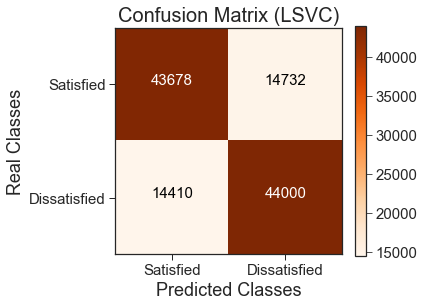

In [35]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_lsvc, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (LSVC)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_lsvc_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 43678`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 14732`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 14410`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 44000`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [36]:
# Calculando e mostrando as métricas de classificação com o "LSVC":
print("Metrics of 'LSVC' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_lsvc, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['LSVC', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['LSVC', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['LSVC', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['LSVC', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'LSVC' model:
Accuracy = 0.7505
Precision = 0.7492
Recall = 0.7533
f1-score = 0.7512


**Análise:**

1. com o classificador **`LSVC`** obtivemos uma taxa de **acurácia** de **75.05%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`LSVC`** apresentou um resultado *muito abaixo do mínimo desejado*;


2. com o nosso classificador **`LSVC`** obtivemos uma taxa de **precisão** de **74.92%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`LSVC`** obtivemos uma taxa de **revocação** de **75.33%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`LSVC`** apresentou um resultado *muito abaixo do mínimo desejado*;


4. com o classificador **`LSVC`** obtivemos uma **`pontuação F1`** **baixa**, porque as taxas de **precisão** e **revocação** também foram baixas.

### `Curva ROC`

In [37]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (LSVC)..."))
    y_dec_scores_lsvc = cross_val_predict(estimator=rfecv_lsvc.estimator_, X=X_train_lsvc, y=y_train,
                                          cv=NUM_FOLDS_CVP, method="decision_function", n_jobs=-1)
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (LSVC):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_lsvc_v1.pickle", object_name=y_dec_scores_lsvc,
                              msg="Version 1 of the decision scores (LSVC) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_lsvc_v1.pickle":
    y_dec_scores_lsvc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_lsvc_v1.pickle",
                                                 msg="The decision scores (LSVC) has been successfully uploaded!")

The decision scores (LSVC) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`LSVC`**, foi de **3.28 segundos**.

In [38]:
# Calculando o "FPR" e "TPR":
fpr, tpr, thresholds = roc_curve(y_train, y_dec_scores_lsvc)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_lsvc)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['LSVC', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_lsvc_v1


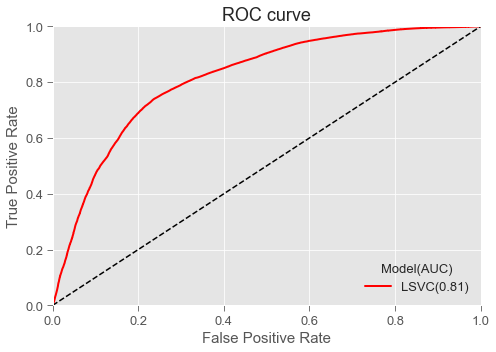

In [39]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr, tpr, auc=auc, auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='LSVC', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_lsvc_v1', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`LSVC`** apresentou uma ***`ROC curve`*** **distante** do *canto superior esquerdo*!

## `3.4-` [XGBC](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier) (XGBoost Classifier):

In [40]:
# Verifica se o algoritmo será treinado:
if (TRAINING): # Utilizar "TRAINING=True" (no Setup) para treinar o modelo!
    # Inicia o treinamento:
    et.start(et.start(msg="Starting the training (XGBC)..."))
    
    # Criando uma instância do classificador XGBC:
    xgbc = XGBClassifier(random_state=RANDOM_STATE, n_jobs=-1)
            
    # Criando a instância de "RFECV":
    rfecv_xgbc = RFECV(estimator=xgbc, step=1, cv=NUM_FOLDS, scoring='accuracy', n_jobs=-1)
    
    # Fit nos dados de treinamento:
    rfecv_xgbc.fit(X_train, y_train)
    
    # Fim do treinamento:
    et.end(msg="Time consumed for training (XGBC):")

    # Salvando o modelo treinado:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="rfecv_xgbc_v1.pickle", object_name=rfecv_xgbc,
                              msg="Version 1 of the model (XGBC) was successfully saved!")
else:
    # O modelo (XGBC) já foi treinado!
    # Carregando o modelo "rfecv_xgbc_v1.pickle":
    rfecv_xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_xgbc_v1.pickle",
                                          msg="The model (XGBC) has been successfully uploaded!")

The model (XGBC) has been successfully uploaded!


**Análise:** o treinamento do **`XGBC`** demorou **`13.61 minutos`**.

Optimal number of features : 32
Best accuracy: 0.9281
Saving figure: plot_nbf_vs_cvs_xgbc


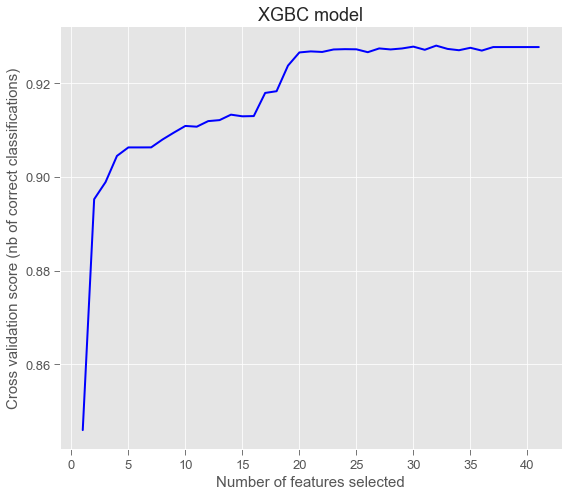

Saving figure: plot_nbf_vs_cvs_zoomed_xgbc


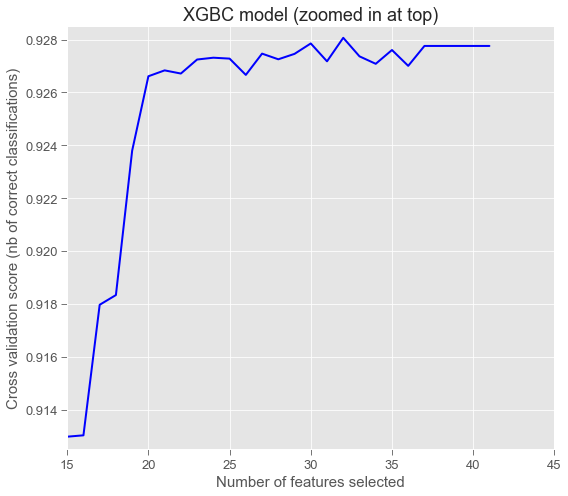

In [41]:
# Plot: número de features versus cross-validation scores:
print("Optimal number of features : %d" % rfecv_xgbc.n_features_)
print("Best accuracy: {}".format(np.round(rfecv_xgbc.grid_scores_[rfecv_xgbc.n_features_-1], decimals=4)))
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_xgbc.grid_scores_) + 1), cv_scores=rfecv_xgbc.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=None,
                                   title='XGBC model', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_xgbc', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

# Plot: número de features versus cross-validation scores (com 'foco' na parte de cima do gráfico):
ptlib.plot_nb_feature_vs_cv_scores(nb_feat=range(1, len(rfecv_xgbc.grid_scores_) + 1), cv_scores=rfecv_xgbc.grid_scores_, 
                                   plot_style='ggplot', linewidth=2.0, color='b', scales=[15, 45, 0.9125, 0.9285],
                                   title='XGBC model (zoomed in at top)', title_fontsize=18, xlabel="Number of features selected",
                                   xlabel_fontsize=15, ylabel="Cross validation score (nb of correct classifications)",
                                   ylabel_fontsize=15, xtick_labelsize=13, ytick_labelsize=13, width=8, height=7,
                                   figure_id='plot_nbf_vs_cvs_zoomed_xgbc', figure_path=PROJECT_IMG_PATH,
                                   figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                  )

In [42]:
# Sumariza a seleção das melhores features:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfecv_xgbc.get_support(), feat_names)]
selected_features = [v for i, v in feature_map if i==True]

# Visualizando as features selecionadas:
print("Selected features: {}".format(len(selected_features)))
print(selected_features)

Selected features: 32
['ind_var30_cat_0', 'num_var4_cat_0', 'num_var4_cat_1', 'num_var4_cat_2', 'num_var4_cat_3', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_1', 'num_meses_var5_ult3_cat_2', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var42_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


In [43]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes):
X_train_xgbc = X_train[:, rfecv_xgbc.get_support()]
print("X_train_xgbc (shape):",X_train_xgbc.shape)

X_train_xgbc (shape): (116820, 32)


**Análise:** com o algoritmo **`XGBC`** obtivemos uma ótima acurácia (**`92.81%`**) utilizando **`32`** features.

Agora, utilizaremos a função ***`cros_val_score()`*** para avaliarmos o nosso modelo ***`XGBClassifier`*** com a utilização da validação cruzada:

> Utilizar **`CROSS_VAL_SCORE=True`** (no **Setup**) para calcular as pontuações (Scores) com o modelo, utilizando a função. Neste caso as pontuações serão **salvas em um objeto**;

> Utilizar **`CROSS_VAL_SCORE=False`** (no **Setup**) para ler e carregar em um objeto as pontuações (Scores) que foram calculadas com o modelo, utilizando a função.

In [44]:
# Calculando as pontuações (scores) nos dados de treinamento:
# Verifica se vamos calcular as pontuações utilizando "validação cruzada":
if (CROSS_VAL_SCORE): # Utilizar "CROSS_VAL_SCORE=True" (no Setup) para calcular os 'scores'!
    # Inicia o cálculo dos 'scores':
    et.start(et.start(msg="Starting cross validation score (XGBC)..."))
    xgbc_scores = cross_val_score(estimator=rfecv_xgbc.estimator_, X=X_train_xgbc, y=y_train,
                                  cv=NUM_FOLDS_CVS, scoring="accuracy", n_jobs=-1)
    # Fim do cálculo dos 'scores':
    et.end(msg="Time consumed for cross validation score (XGBC):")
    
    # Salvando as pontuações (scores) calculadas:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="xgbc_scores_v1.pickle", object_name=xgbc_scores,
                              msg="Version 1 of the scores (XGBC) was successfully saved!")
else:
    # As pontuações (scores) já foram calculadas!
    # Carregando os scores "xgbc_scores_v1.pickle":
    xgbc_scores = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="xgbc_scores_v1.pickle",
                                           msg="The scores (XGBC) has been successfully uploaded!")

The scores (XGBC) has been successfully uploaded!


In [45]:
# Mostrando os resultados:
mllib.display_scores(scores=xgbc_scores)

Scores: 5
[0.8842 0.9372 0.94   0.9368 0.9381]
Mean: 0.9273
Standard deviation: 0.0216


**Análise:** o tempo consumido para cálcularmos as pontuações (**`scores`**), com o modelo **`XGBC`**, foi de **23.12 segundos**. Obtivemos um resultado **excelente (acima de 93%**) em quase todas as partes (*folds*) da validação cruzada.

### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais. Como não podemos utilizar os dados do nosso conjunto de testes, utilizaremos a função ***`cross_val_predict()`***.

Assim como a função ***cross_val_score***, ela desempenha a validação cruzada *K-fold*, mas em vez de retornar as pontuações da avaliação, ela retorna as previsões feitas em cada parte do teste, ou seja, isso significa que nós obteremos uma previsão limpa para cada instância no conjunto de treinamento (**"limpa"**, significando que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

In [46]:
# Calculando as previsões nos dados de treinamento:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting cross validation predict (XGBC)..."))
    y_train_pred_xgbc = cross_val_predict(estimator=rfecv_xgbc.estimator_, X=X_train_xgbc, y=y_train,
                                          cv=NUM_FOLDS_CVP, n_jobs=-1)
    
    # Fim das previsões:
    et.end(msg="Time consumed for cross validation predict (XGBC):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_train_pred_xgbc_v1.pickle", object_name=y_train_pred_xgbc,
                              msg="Version 1 of the predicts (XGBC) was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_train_pred_xgbc_v1.pickle":
    y_train_pred_xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_train_pred_xgbc_v1.pickle",
                                                 msg="The predicts (XGBC) has been successfully uploaded!")

The predicts (XGBC) has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`XGBC`**, foi de **24.08 segundos**.

Saving figure: plot_confusion_matrix_xgbc_v1


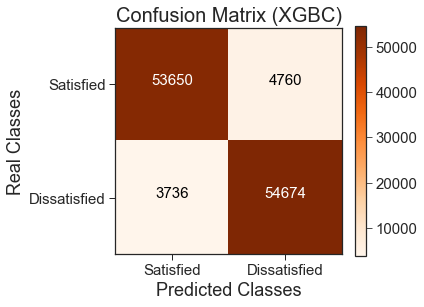

In [47]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_train, pred=y_train_pred_xgbc, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (XGBC)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_xgbc_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 53650`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 4760`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 3736`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 54674`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [48]:
# Calculando e mostrando as métricas de classificação com o "XGBC":
print("Metrics of 'XGBC' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_train, y_pred=y_train_pred_xgbc, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['XGBC', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['XGBC', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['XGBC', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['XGBC', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'XGBC' model:
Accuracy = 0.9273
Precision = 0.9199
Recall = 0.9360
f1-score = 0.9279


**Análise:**

1. com o classificador **`XGBC`** obtivemos uma taxa de **acurácia** de **92.73%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`XGBC`** apresentou um resultado *acima do mínimo desejado*;


2. com o nosso classificador **`XGBC`** obtivemos uma taxa de **precisão** de **91.99%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`XGBC`** obtivemos uma taxa de **revocação** de **93.60%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`XGBC`** apresentou um resultado *acima do mínimo desejado*;


4. com o classificador **`XGBC`** obtivemos uma **`pontuação F1`** **alta**, devido as ótimas taxas de **precisão** e **revocação**.

### `Curva ROC`

In [49]:
# Calculando as 'pontuações de decisão' nos dados de treinamento:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (CROSS_VAL_PREDICT): # Utilizar "CROSS_VAL_PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (XGBC)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_xgbc = cross_val_predict(estimator=rfecv_xgbc.estimator_, X=X_train_xgbc, y=y_train,
                                      cv=NUM_FOLDS_CVP, method="predict_proba", n_jobs=-1)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_xgbc = y_probas_xgbc[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (XGBC):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_ML_PATH, file="y_dec_scores_xgbc_v1.pickle", object_name=y_dec_scores_xgbc,
                              msg="Version 1 of the decision scores (XGBC) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_xgbc_v1.pickle":
    y_dec_scores_xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="y_dec_scores_xgbc_v1.pickle",
                                                 msg="The decision scores (XGBC) has been successfully uploaded!")

The decision scores (XGBC) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`XGBC`**, foi de **21.84 segundos**.

In [50]:
# Calculando o "FPR" e "TPR":
fpr, tpr, thresholds = roc_curve(y_train, y_dec_scores_xgbc)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_train, y_dec_scores_xgbc)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['XGBC', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_xgbc_v1


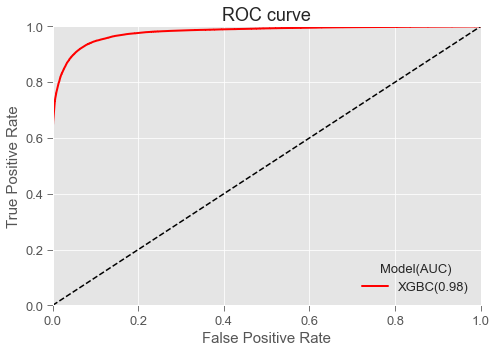

In [51]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr, tpr, auc=auc, auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='XGBC', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_xgbc_v1', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`XGBC`** apresentou uma ***`ROC curve`*** **muito próxima** do *canto superior esquerdo*!

## `04-` Conclusão:

Agora, vamos plotar um gráfico comparando as taxas de acurácia (**`Accuracy`**) e as taxas de revocação (**`Recall`**), de cada modelo, e então vamos selecionar alguns modelos para a próxima etapa (**`Machine Learning (Step 03)`**):

Saving figure: plot_models_vs_accuracy_v1


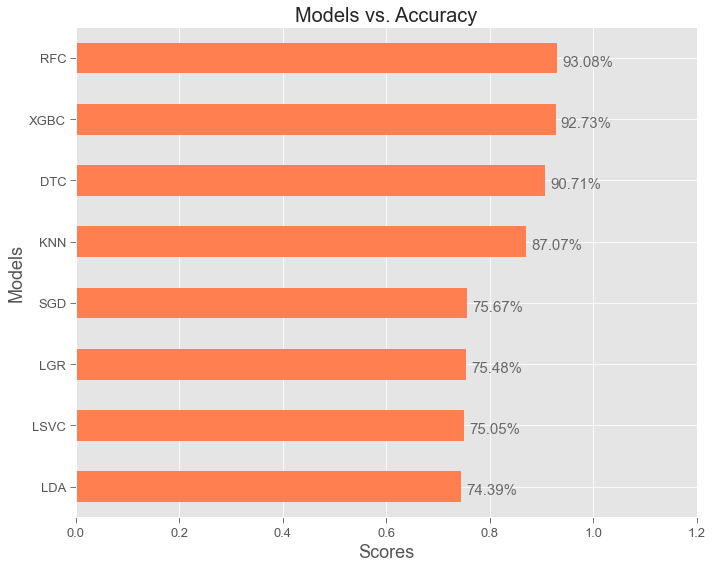

Saving figure: plot_models_vs_recall_v1


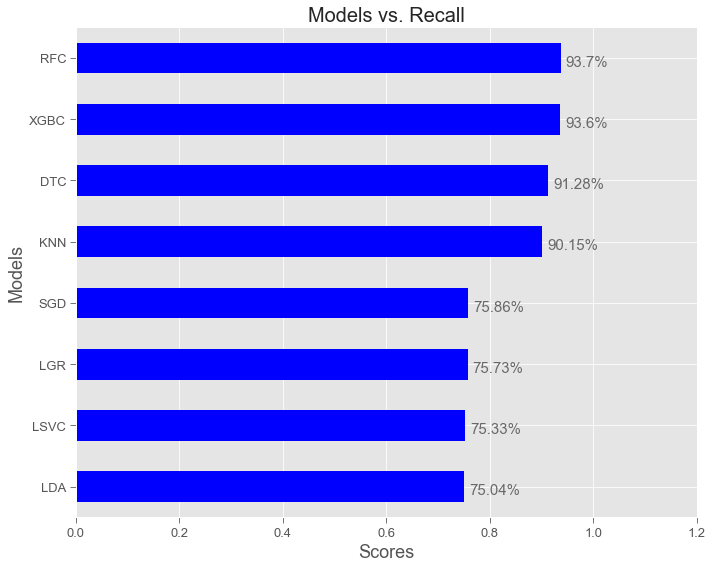

In [52]:
# Classificando as taxas de acurácia:
models_accuracy = classif_metrics_df['Accuracy'].sort_values(ascending=False)

# Plot:
ptlib.plot_models_vs_scores(scores=models_accuracy, plot_style='ggplot', bar_color='coral', alpha=0.8,
                            score_color='dimgrey', score_fontsize=15, title="Models vs. Accuracy",
                            title_fontsize=20, xlabel="Scores", xlabel_fontsize=18, ylabel='Models',
                            ylabel_fontsize=18, ticks_fontsize=13, width=10, height=8,
                            figure_id='plot_models_vs_accuracy_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png",
                            tight_layout=True, dpi=300
                           )

# Classificando as taxas de revocação:
models_recall = classif_metrics_df['Recall'].sort_values(ascending=False)

# Plot:
ptlib.plot_models_vs_scores(scores=models_recall, plot_style='ggplot', bar_color='blue', alpha=0.8,
                            score_color='dimgrey', score_fontsize=15, title="Models vs. Recall",
                            title_fontsize=20, xlabel="Scores", xlabel_fontsize=18, ylabel='Models',
                            ylabel_fontsize=18, ticks_fontsize=13, width=10, height=8,
                            figure_id='plot_models_vs_recall_v1', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png",
                            tight_layout=True, dpi=300
                           )

**Análise:** Podemos observar que `04` algoritmos se destacaram e obtiveram as melhores pontuações (`Scores`) nas métricas de acurácia (**`Accuracy`**) e revocação (**`Recall`**). Entretanto, vamos selecionar apenas `03` algoritmos para a próxima etapa, a saber:

> 1. **`RFC`**: Random Forest Classifier;
> 2. **`XGBC`**: XGBoost Classifier;
> 3. **`KNN`**: K Nearest Neighbors.

Embora o algoritmo **`DTC`** tenha apresentado ótimas pontuações (`Score`), não iremos selecioná-lo para a próxima etapa, pois o algoritmo **`RFC`** também trabalha com *decision tree* e apresentou uma performance melhor.

## `05-` Salvando as `métricas de classificação`:

In [53]:
# Mostrar todas métricas de classificação calculadas nas duas etapas:
classif_metrics_df

,Accuracy,Precision,Recall,f1-score,AUC
Models,,,,,
SGD,0.7567,0.7557,0.7586,0.7571,0.8182
KNN,0.8707,0.8492,0.9015,0.8746,0.9302
LGR,0.7548,0.7536,0.7573,0.7554,0.8181
DTC,0.9071,0.9026,0.9128,0.9077,0.9133
RFC,0.9308,0.9255,0.937,0.9313,0.9702
LDA,0.7439,0.7407,0.7504,0.7455,0.8124
LSVC,0.7505,0.7492,0.7533,0.7512,0.815
XGBC,0.9273,0.9199,0.936,0.9279,0.9789


In [54]:
# Salvando as métricas de classificação:
dslib.pickle_object_save (path=PROJECT_ML_PATH, file="classif_metrics_df_v1.pickle", object_name=classif_metrics_df,
                          msg="The 'classif_metrics_df_v1' (metrics) has been successfully saved!")

The 'classif_metrics_df_v1' (metrics) has been successfully saved!


## <font color='black'>FIM</font>